In [1]:
%config InlineBackend.figure_format ='retina'
%matplotlib inline

import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set options
sns.set_style('darkgrid')
pd.set_option("display.max_rows", 10)

def read_excel(filespec):
    # read file into pandas DataFrame
    answer = pd.read_excel(filespec)
    
    # set column names to lower case for easier typing
    answer.columns = [colname.lower() for colname in list(answer.columns.values)]
    
    # return answer
    return(answer)

In [24]:
institutions = read_excel("data/HD2016.xlsx")
institutions = institutions.query("cyactive == 1 & iclevel == 1 & ugoffer == 1 & dfrcuscg in [1, 2]")
institutions = institutions[["unitid", "instnm", "city", "stabbr", "longitud", "latitude", "dfrcuscg"]]
institutions

,unitid,instnm,city,stabbr,longitud,latitude,dfrcuscg
0,100654,Alabama A & M University,Normal,AL,-86.568502,34.783368,1
1,100663,University of Alabama at Birmingham,Birmingham,AL,-86.799345,33.505697,1
2,100690,Amridge University,Montgomery,AL,-86.174010,32.362609,2
3,100706,University of Alabama in Huntsville,Huntsville,AL,-86.640449,34.724557,2
4,100724,Alabama State University,Montgomery,AL,-86.295677,32.364317,1
...,...,...,...,...,...,...,...
7454,489344,Chamberlain College of Nursing-North Carolina,Charlotte,NC,-80.931971,35.137660,2
7455,489353,Chamberlain College of Nursing-California,Rancho Cordova,CA,-121.278258,38.596193,2
7497,489779,Kaplan University-Indianapolis,Indianapolis,IN,-86.109501,39.918440,2
7498,489788,Kaplan University-Milwaukee,Milwaukee,WI,-87.913354,43.038608,2


In [3]:
peer_lists = read_excel("data/CUSTOMCGIDS2016.xlsx")[["unitid", "cgunitid"]]
peer_lists

,unitid,cgunitid
0,100654,100706
1,100654,100724
2,100654,100830
3,100654,101480
4,100654,101879
...,...,...
43594,488679,465812
43595,488679,479956
43596,488679,480569
43597,488679,484631


In [10]:
peer_lists = pd.merge(peer_lists, institutions, on = "unitid")

In [13]:
peer_graph = nx.from_pandas_edgelist(peer_lists, "unitid", "cgunitid", create_using = nx.DiGraph)

peer_graph.number_of_nodes()

3212

In [14]:
# nx.draw_networkx(peer_graph)
nx.degree(peer_graph, 181464)

34

In [19]:
nx.clustering(peer_graph, 181464)

0.32468694096601075

In [38]:
nx.shortest_path(peer_graph, 181464, 152080)

[181464, 153603, 130943, 131496, 152080]

In [39]:
nx.shortest_path_length(peer_graph, 181464, 152080)

4

In [53]:
institutions.query("unitid in {}".format(nx.shortest_path(peer_graph, 181464, 152080)))
# unl = nx.bfs_tree(peer_graph, 181464)
# nx.draw_networkx(unl)

,unitid,instnm,city,stabbr,longitud,latitude,dfrcuscg
693,130943,University of Delaware,Newark,DE,-75.752822,39.679577,1
704,131496,Georgetown University,Washington,DC,-77.073463,38.908809,1
1223,152080,University of Notre Dame,Notre Dame,IN,-86.238959,41.703058,1
1280,153603,Iowa State University,Ames,IA,-93.648504,42.026212,1
2164,181464,University of Nebraska-Lincoln,Lincoln,NE,-96.700508,40.817598,1


In [63]:
peer_graph[181464]

AtlasView({126614: {}, 126818: {}, 145637: {}, 153603: {}, 153658: {}, 155317: {}, 174066: {}, 178396: {}, 204796: {}, 243780: {}})

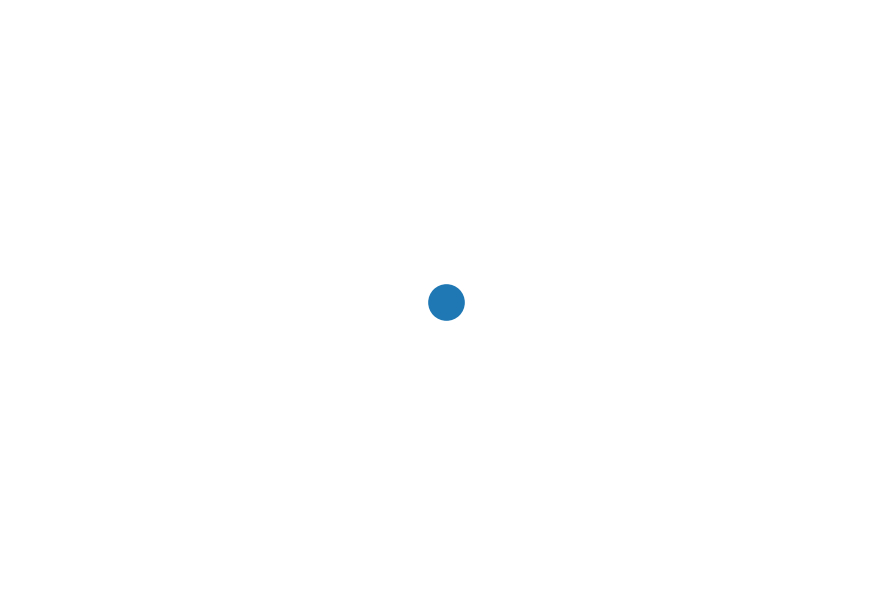

In [73]:
nx.draw(nx.subgraph(peer_graph, 181464))

In [43]:
nx.to_pandas_edgelist(peer_graph)

,source,target
0,100654,100706
1,100654,100724
2,100654,100830
3,100654,101480
4,100654,101879
...,...,...
29789,488679,465812
29790,488679,479956
29791,488679,480569
29792,488679,484631


In [47]:
nx.to_pandas_adjacency(peer_graph)

,100654,100706,100724,100830,101480,101879,102094,102614,110097,117140,...,199494,233949,437103,487010,487524,487603,488679,460738,465812,489779
100654,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100724,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100830,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
460738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
